# Visualizzazione dati normalizzati (UMAP, mean trends, stratified plots)

In [1]:
# Cell: setup
import os
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

# Aggiungi progetto al path (adatta il nome della cartella se necessario)
current_file = os.path.abspath('')
parent_dir = current_file
while os.path.basename(parent_dir) != 'cellPIV':
    parent_dir = os.path.dirname(parent_dir)
    if parent_dir == '' or parent_dir == '/':
        break
sys.path.append(parent_dir)

# Import di config e utils già presenti nel progetto
from config import Config_02c_splitAndNormalization as conf
from config import utils
from _utils_._utils import detect_time_columns

print('Project root:', parent_dir)
print('Config csv path:', conf.csv_file_path)

# Shortcut function per caricare csv normalizzati (train/val/test)
def load_normalized_csvs(day):
    train_path, val_path, test_path = conf.get_paths(day)
    train = pd.read_csv(train_path)
    val = pd.read_csv(val_path)
    test = pd.read_csv(test_path)
    return train, val, test


Project root: /home/phd2/Scrivania/CorsoRepo/cellPIV
Config csv path: /home/phd2/Scrivania/CorsoRepo/cellPIV/datasets/Farneback/FinalDataset.csv


/home/phd2/Scrivania/CorsoVenvs/BlastoVenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Cell: carica e ispeziona
DAY = 1  # Giorno da caricare (1, 3, 5)
train, val, test = load_normalized_csvs(DAY)

print('Train shape:', train.shape)
print('Val shape:', val.shape)
print('Test shape:', test.shape)

# Individual columns
value_cols = detect_time_columns(train)
print('Numero colonne temporali:', len(value_cols))
print('Esempio colonne temporali (prime 10):', value_cols[:10])

# Mostra prime righe
train.head()

Train shape: (3506, 103)
Val shape: (743, 103)
Test shape: (762, 103)
Numero colonne temporali: 97
Esempio colonne temporali (prime 10): ['0.00h', '0.25h', '0.50h', '0.75h', '1.00h', '1.25h', '1.50h', '1.75h', '2.00h', '2.25h']


,patient_id,dish_well,BLASTO NY,eup_aneup,PN,maternal age,0.00h,0.25h,0.50h,0.75h,...,21.75h,22.00h,22.25h,22.50h,22.75h,23.00h,23.25h,23.50h,23.75h,24.00h
0,54,D2013.02.19_S0675_I141_1,1,euploide,2PN,37,0.946754,0.999881,0.962969,1.000000,...,0.061301,0.066961,0.087287,0.083305,0.067804,0.076126,0.061490,0.074607,0.150465,0.376209
1,54,D2013.02.19_S0675_I141_2,1,euploide,2PN,37,1.000000,0.999737,0.983574,0.942451,...,0.092992,0.086952,0.114082,0.205116,0.263492,0.366759,0.465823,0.480955,0.485651,0.502673
2,54,D2013.02.19_S0675_I141_3,0,NaN,2PN,37,0.630672,0.531088,0.565852,0.637029,...,0.000098,0.068068,0.101485,0.150648,0.081552,0.031544,0.047119,0.024374,0.088903,0.130729
3,54,D2013.02.19_S0675_I141_4,0,NaN,2PN,37,0.850858,0.999366,1.000000,0.934226,...,0.059127,0.113144,0.126941,0.107794,0.092703,0.060430,0.033567,0.025014,0.029921,0.033640
4,54,D2013.02.19_S0675_I141_5,1,Aneuploide,2PN,37,0.816634,0.821092,0.988713,0.998152,...,0.000740,0.058404,0.033983,0.044581,0.090609,0.064761,0.104566,0.102732,0.132399,0.274296


In [3]:
# Cell: calcola UMAP usando le funzioni del progetto (se presenti)
# Nota: il progetto contiene funzioni come compute_UMAP_with_plotly e compute_tSNE
DAYS = [1, 3, 5] # Giorno da caricare (1, 3, 5)

from _utils_.dimReduction import compute_UMAP_with_plotly

OUTPUT_DIR = conf.visual_output_dir_base
os.makedirs(OUTPUT_DIR, exist_ok=True)

for DAY in DAYS:
    print(f"\n--- Elaborazione UMAP per {DAY} giorni ---")
    train_path, val_path, test_path = conf.get_paths(DAY)
    compute_UMAP_with_plotly(data_csv_path=train_path, 
                             days_to_consider=DAY, 
                             output_path_base=None, 
                             max_frames=None, 
                             inline_show=True)


2025-10-01 13:04:17.697314: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-01 13:04:17.704235: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759316657.711995   19874 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759316657.714464   19874 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759316657.720850   19874 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 


--- Elaborazione UMAP per 1 giorni ---



--- Elaborazione UMAP per 3 giorni ---



--- Elaborazione UMAP per 5 giorni ---


## Visualizzazione andamento medio (train/val/test)

Colonne temporali rilevate: 481


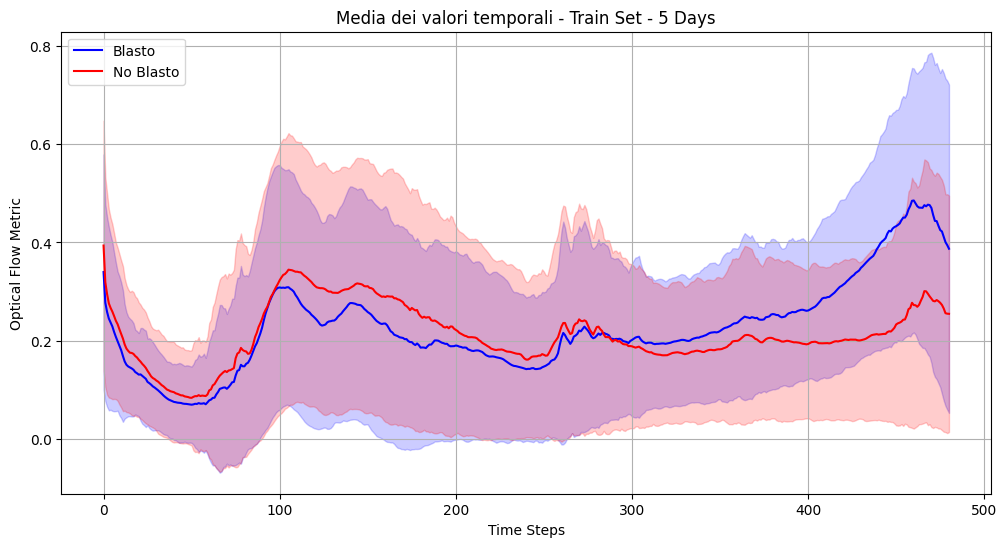

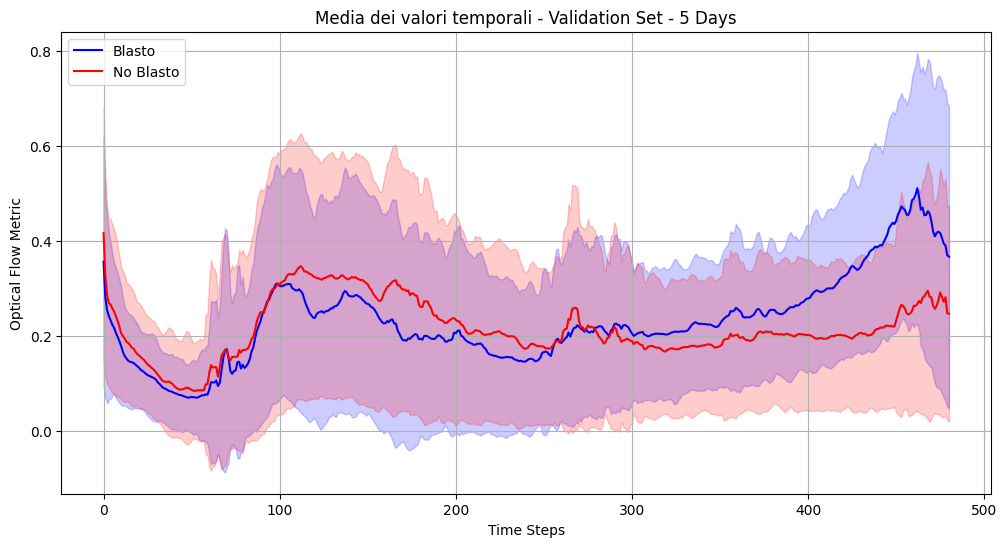

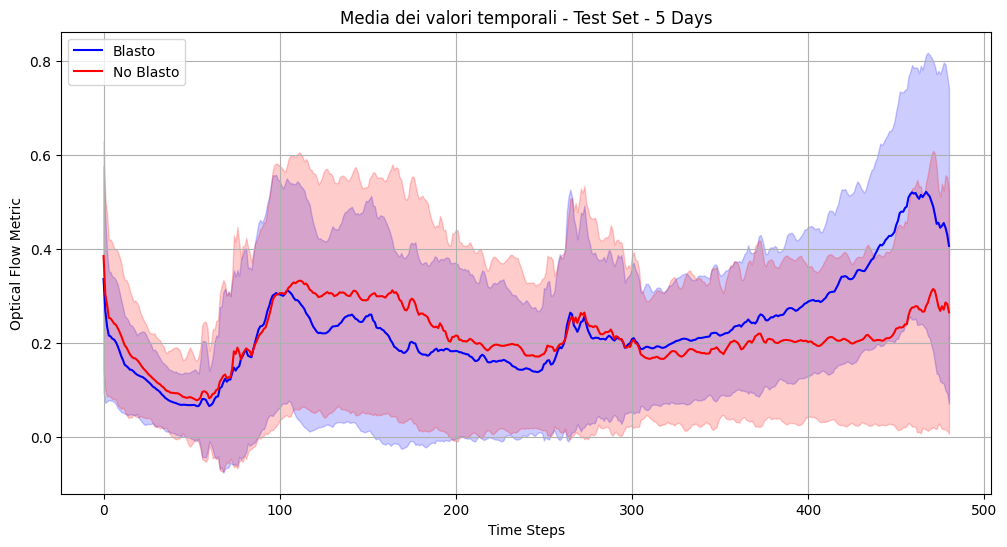

In [7]:
# Cell: crea i grafici delle medie temporali usando le funzioni già fornite
%matplotlib inline
DAY = 5  # Giorno da caricare (1, 3, 5)
train, val, test = load_normalized_csvs(DAY)

from _02c_splitAndnormalization._02_visualization import (
    create_and_save_plots_mean_temp_data,
    create_and_save_stratified_plots_mean_temp_data,
    visualize_normalized_data_single_pt
)

OUTPUT_BASE = None
temp_cols = detect_time_columns(train)
print(f"Colonne temporali rilevate: {len(temp_cols)}")

create_and_save_plots_mean_temp_data(
    train_data=train,
    val_data=val,
    test_data=test,
    output_base=OUTPUT_BASE,
    seed=conf.seed,
    temporal_data_type=conf.temporalDataType,
    days_to_consider=DAY,
    shift_x=conf.initial_frames_to_cut,
    temporal_columns=temp_cols
)

In [5]:
# Cell: merge semplice con il database originale per ottenere merged_PN
import pandas as pd

original_db = pd.read_excel(conf.path_original_excel)
# Expect column 'slide_well' e 'PN' (adatta se necessario)
if 'PN' in original_db.columns and 'slide_well' in original_db.columns:
    db_small = original_db[['slide_well', 'PN']]
    # Merge sui tre dataset
    def merge_pn(df):
        merged = pd.merge(df, db_small, left_on='dish_well', right_on='slide_well', how='left')
        merged['merged_PN'] = merged['PN'].astype(str)
        merged = merged.drop(columns=['slide_well', 'PN'], errors='ignore')
        return merged

    train_m = merge_pn(train)
    val_m = merge_pn(val)
    test_m = merge_pn(test)

    create_and_save_stratified_plots_mean_temp_data(
        train_merged=train_m,
        val_merged=val_m,
        test_merged=test_m,
        output_base=OUTPUT_BASE,
        seed=conf.seed,
        temporal_data_type=conf.temporalDataType,
        days_to_consider=DAY,
        shift_x=conf.initial_frames_to_cut
    )
    print('Stratified plots salvati in', os.path.join(OUTPUT_BASE, 'examples_stratified'))
else:
    print('Il file originale non contiene le colonne attese (slide_well/PN). Controlla conf.path_original_excel')

KeyError: 'PN'

In [ ]:
# Cell: seleziona e salva un esempio per paziente
# Puoi passare specific_patient_to_analyse=None per selezione casuale
visualize_normalized_data_single_pt(
    original_data=train if 'merged_PN' not in train.columns else train_m,
    normalized_data=train,
    output_base=OUTPUT_BASE,
    specific_patient_id=None,
    shift_x=conf.initial_frames_to_cut
)